In [9]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler,RobustScaler,StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import train_test_split

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout,Bidirectional, LSTM, SimpleRNN,GRU,Input
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint


In [10]:
# Load the dataset
# df = pd.read_excel('../../dataset/Dataset_IoV.xlsx')  
df = pd.read_csv('..//..//dataset//preliminary_dataset.csv')  


# Separating features and target
X = df[['Number of Lanes', 'Status of driver', 'Nature of environment', 'Velocity of vehicle', 'Distance between vehicles', 'Breaking capability']]
y = df['Collussion']
# scaler=RobustScaler()
# X_scaled = scaler.fit_transform(X)

# scaler = StandardScaler()
# X_scaled = scaler.fit_transform(X)
X_scaled = X

# Reshape input to be 3D [samples, timesteps, features] for LSTM
X_scaled = np.reshape(X_scaled, (X_scaled.shape[0], 1, X_scaled.shape[1]))

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


In [11]:
print(X_train.shape, y_train.shape,X_scaled.shape)

(32000, 1, 6) (32000,) (40000, 1, 6)


# Model

In [12]:
def build_drnn():
    model = Sequential()
    
    # Input layer
    model.add(Input(shape=(X_train.shape[1], X_train.shape[2])))
    
    # DRNN layers with 3 hidden layers
    model.add(SimpleRNN(units=50, activation='relu', return_sequences=True))
    model.add(SimpleRNN(units=50, activation='relu', return_sequences=True))
    model.add(SimpleRNN(units=50, activation='relu'))
    
    # Output layer
    model.add(Dense(units=1, activation='sigmoid'))
    
    # Compile the model
    model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['mse', 'mae'])
    
    return model


In [13]:
model = build_drnn()
history = model.fit(X_train, y_train, epochs=5, batch_size=32, validation_data=(X_test, y_test))


Epoch 1/5
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 17s 8ms/step - loss: 0.1573 - mae: 0.1036 - mse: 0.0486 - val_loss: 0.0711 - val_mae: 0.0358 - val_mse: 0.0213
Epoch 2/5
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - loss: 0.0684 - mae: 0.0386 - mse: 0.0206 - val_loss: 0.0597 - val_mae: 0.0364 - val_mse: 0.0184
Epoch 3/5
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - loss: 0.0563 - mae: 0.0336 - mse: 0.0174 - val_loss: 0.0474 - val_mae: 0.0279 - val_mse: 0.0150
Epoch 4/5
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - loss: 0.0506 - mae: 0.0311 - mse: 0.0157 - val_loss: 0.0435 - val_mae: 0.0274 - val_mse: 0.0137
Epoch 5/5
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - loss: 0.0473 - mae: 0.0286 - mse: 0.0147 - val_loss: 0.0433 - val_mae: 0.0288 - val_mse: 0.0137


In [5]:
# Instantiate and train the model
model = build_drnn()
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test))


Epoch 1/50
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 16s 8ms/step - loss: 0.1563 - mae: 0.1044 - mse: 0.0495 - val_loss: 0.0773 - val_mae: 0.0465 - val_mse: 0.0239
Epoch 2/50
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - loss: 0.0609 - mae: 0.0370 - mse: 0.0187 - val_loss: 0.0495 - val_mae: 0.0318 - val_mse: 0.0152
Epoch 3/50
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - loss: 0.0498 - mae: 0.0303 - mse: 0.0154 - val_loss: 0.0438 - val_mae: 0.0289 - val_mse: 0.0137
Epoch 4/50
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - loss: 0.0507 - mae: 0.0308 - mse: 0.0158 - val_loss: 0.0516 - val_mae: 0.0279 - val_mse: 0.0155
Epoch 5/50
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step - loss: 0.0431 - mae: 0.0267 - mse: 0.0135 - val_loss: 0.0438 - val_mae: 0.0250 - val_mse: 0.0135
Epoch 6/50
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - loss: 0.0429 - mae: 0.0263 - mse: 0.0136 - val_loss: 0.0401 - val_mae: 0.0264 - val_mse: 0.0128
Epoch 7/50
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - loss: 0.0414 - mae: 0.0255 - ms

In [6]:
from sklearn.metrics import mean_squared_error
import numpy as np
# Make predictions
y_pred = model.predict(X_test)




250/250 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step


In [7]:
# Convert continuous output to binary (0 or 1) using a threshold

y_pred_binary = (y_pred > 0.5).astype(int)
y_pred_binary = y_pred_binary.flatten()

# Convert y_test to a NumPy array and flatten
y_test_flat = y_test.to_numpy().flatten()

y_pred_flat = y_pred.flatten()
mse = mean_squared_error(y_test_flat, y_pred_flat)
print(f'Mean Squared Error for y_pred_flat (MSE): {mse:.16f}')

# Calculate RMSE
rmse = np.sqrt(mse)
print(f'Root Mean Squared Error (RMSE): {rmse:.16f}')


Mean Squared Error for y_pred_flat (MSE): 0.0115068452432752
Root Mean Squared Error (RMSE): 0.1072699643109625


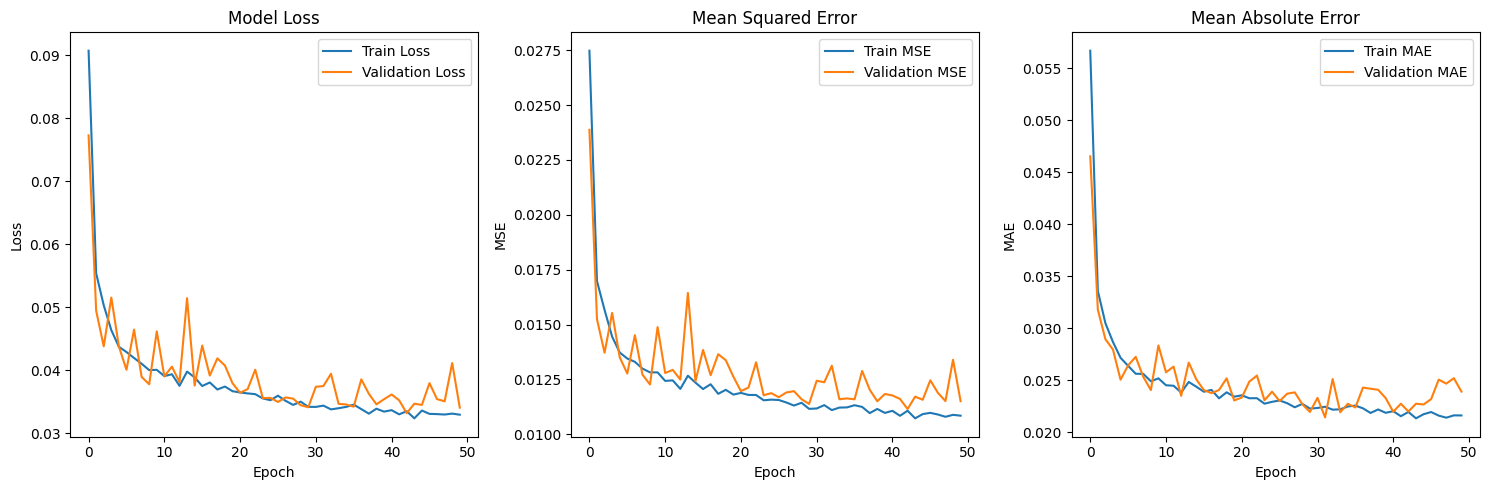

In [8]:
import matplotlib.pyplot as plt

# Visualizing the loss, MSE, and MAE
plt.figure(figsize=(15, 5))

# Loss plot
plt.subplot(1, 3, 1)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(loc='upper right')

# MSE plot
plt.subplot(1, 3, 2)
plt.plot(history.history['mse'], label='Train MSE')
plt.plot(history.history['val_mse'], label='Validation MSE')
plt.title('Mean Squared Error')
plt.ylabel('MSE')
plt.xlabel('Epoch')
plt.legend(loc='upper right')

# MAE plot
plt.subplot(1, 3, 3)
plt.plot(history.history['mae'], label='Train MAE')
plt.plot(history.history['val_mae'], label='Validation MAE')
plt.title('Mean Absolute Error')
plt.ylabel('MAE')
plt.xlabel('Epoch')
plt.legend(loc='upper right')

plt.tight_layout()
plt.show()


In [14]:
import time

# Start time
start_time = time.time()

# Make predictions
y_pred = model.predict(X_test)

# End time
end_time = time.time()

# Total AES time
total_time = end_time - start_time  

# AES per sample
aes_per_sample = (total_time / len(X_test)) * 1e6  # Convert to microseconds (µs)

print(f'Total AES Time: {total_time:.6f} seconds')
print(f'AES Time per Sample: {aes_per_sample:.2f} µs/sample')


250/250 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step
Total AES Time: 1.990527 seconds
AES Time per Sample: 248.82 µs/sample
